Classification of Titanic Survival

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head(800)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_data.shape
test_data.shape


(418, 11)

In [6]:
train_data.drop(['Name'], axis=1, inplace=True)
test_data.drop(['Name'], axis=1, inplace=True)


In [7]:
train_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_data.Pclass.unique()
        
features_drop = ['PassengerId', 'Ticket', 'Fare', 'Cabin']


train_data = train_data.drop(features_drop, axis=1)

feature_drop = [ 'Ticket', 'Fare', 'Cabin']
test_data = test_data.drop(feature_drop, axis=1) 

In [9]:
train_data.Sex.unique()

train_data['Sex'].value_counts()
train_data.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [10]:
train_data.Parch.unique()


array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [11]:
# train_data.drop('Ticket', axis=1, inplace=True)
# train_data.Fare.unique()



In [12]:
train_data.isnull().sum()



Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [13]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [14]:
train_data["Embarked"].fillna( method ='ffill', inplace = True) 

train_data["Age"].fillna( method ='ffill', inplace = True) 

test_data["Age"].fillna( method ='ffill', inplace = True) 

In [15]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [16]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [17]:
# not using drop any because the missing value is much

# train_data = train_data.dropna(axis=0, how="any")
# test_data = test_data.dropna(axis=0, how="any")

In [18]:
train_data.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null bool
Pclass      891 non-null bool
Sex         891 non-null bool
Age         891 non-null bool
SibSp       891 non-null bool
Parch       891 non-null bool
Embarked    891 non-null bool
dtypes: bool(7)
memory usage: 6.2 KB


In [19]:
test_data.isnull().sum()


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [20]:
test_data.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


In [21]:
# # transform the string data to number

# Sex_cat = {'male': 1,
#                   'female': 0}

#     train_data['Sex'] = [Sex_cat[x] for x in train_data['Sex']]

    
embarked_mapping = {"S": 0, "C": 1, "Q":2}

train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)

Sex_mapping = {'male': 1, 'female': 0}
train_data['Sex'] = train_data['Sex'].map(Sex_mapping)
test_data['Sex'] = test_data['Sex'].map(Sex_mapping)

train_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,0
1,1,1,0,38.0,1,0,1
2,1,3,0,26.0,0,0,0
3,1,1,0,35.0,1,0,0
4,0,3,1,35.0,0,0,0


In [22]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [23]:
r = [0, 18, 45, 65, 100]
g = [0,1,2,3]
train_data['Age_cat'] = pd.cut(train_data['Age'], bins = r, labels = g)


test_data['Age_cat'] = pd.cut(test_data['Age'], bins = r, labels = g)

    
    

    

In [24]:
test_data.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_cat
0,892,3,1,34.5,0,0,2,1
1,893,3,0,47.0,1,0,0,2
2,894,2,1,62.0,0,0,2,2
3,895,3,1,27.0,0,0,0,1
4,896,3,0,22.0,1,1,0,1


In [25]:
# train_data['Survived'].value_counts()
train_data['Embarked'].value_counts()

0    644
1    169
2     78
Name: Embarked, dtype: int64

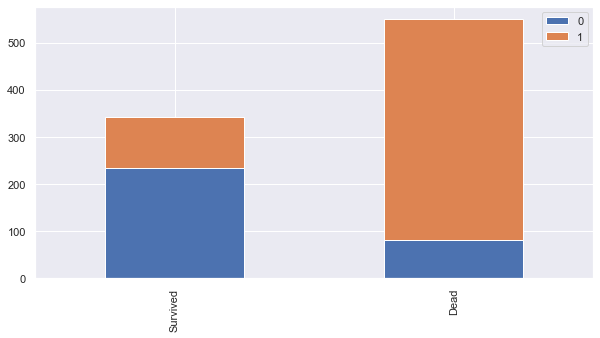

In [26]:
def bar_chart(feature):
    survived = train_data[train_data['Survived'] == 1][feature].value_counts()
    dead = train_data[train_data['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked = True, figsize=(10,5))
    
bar_chart('Sex')


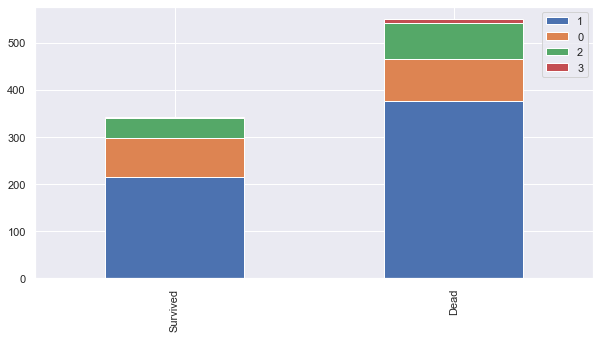

In [27]:
bar_chart('Age_cat')

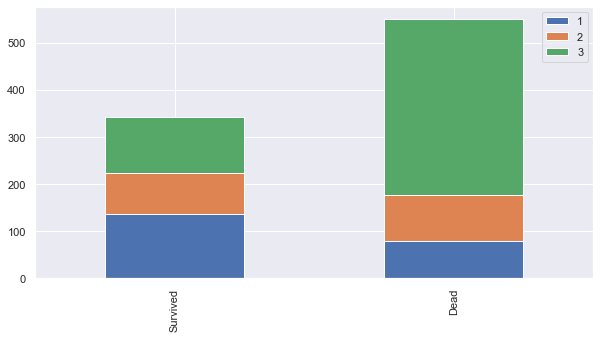

In [28]:
bar_chart('Pclass')

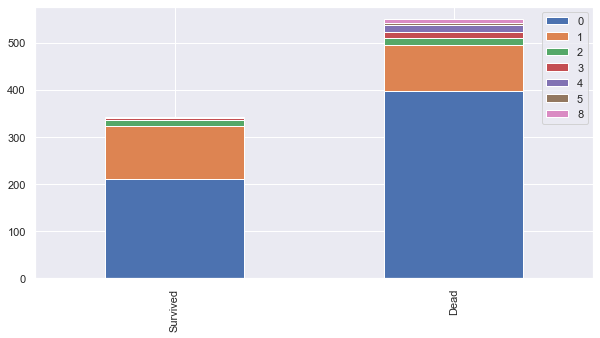

In [29]:
bar_chart('SibSp')



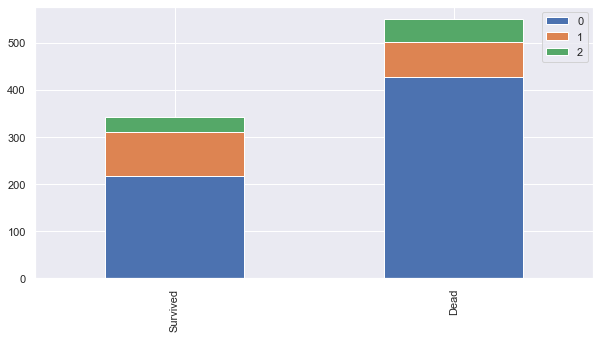

In [30]:
bar_chart('Embarked')

which classifier to use for modelling

In [31]:

target = train_data['Survived']
train_data = train_data.drop('Survived', axis=1)

train_data = train_data.drop('Age', axis=1)

train_data.head(5)
target.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null int64
Age_cat     891 non-null category
dtypes: category(1), int64(5)
memory usage: 36.0 KB


In [33]:
train_data.dtypes
train_data.head(5)

,Pclass,Sex,SibSp,Parch,Embarked,Age_cat
0,3,1,1,0,0,1
1,1,0,1,0,1,1
2,3,0,0,0,0,1
3,1,0,1,0,0,1
4,3,1,0,0,0,1


In [34]:
test_data.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_cat
0,892,3,1,34.5,0,0,2,1
1,893,3,0,47.0,1,0,0,2
2,894,2,1,62.0,0,0,2,2
3,895,3,1,27.0,0,0,0,1
4,896,3,0,22.0,1,1,0,1


In [35]:
test_data = test_data.drop('Age', axis=1)

test_data.head(5)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Age_cat
0,892,3,1,0,0,2,1
1,893,3,0,1,0,0,2
2,894,2,1,0,0,2,2
3,895,3,1,0,0,0,1
4,896,3,0,1,1,0,1


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [37]:
# Cross Validation (K-fold)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

kNeighb = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(kNeighb, train_data, target, cv=k_fold, n_jobs=1, scoring = scoring)

print(score)

[0.81111111 0.7752809  0.80898876 0.82022472 0.85393258 0.82022472
 0.75280899 0.76404494 0.79775281 0.80898876]


In [38]:
round(np.mean(score)*100,2)

80.13

Desicion Tree Classifier

In [39]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, 
                        target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.80898876 0.75280899 0.83146067 0.7752809  0.84269663
 0.80898876 0.80898876 0.74157303 0.76404494]


In [40]:
round(np.mean(score)*100,2) 

79.35

# Random Forest 

In [41]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=2, scoring=scoring)
print(score)

[0.8        0.79775281 0.75280899 0.80898876 0.82022472 0.84269663
 0.80898876 0.80898876 0.75280899 0.75280899]


In [42]:
round(np.mean(score)*100,2) 

79.46

# Naive BAyes

In [43]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring = scoring)

print(score)

[0.84444444 0.7752809  0.76404494 0.76404494 0.74157303 0.78651685
 0.7752809  0.82022472 0.80898876 0.79775281]


In [44]:
round(np.mean(score)*100, 2)

78.78

# Testing

We test the project here


In [45]:
test_data.head(5)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Age_cat
0,892,3,1,0,0,2,1
1,893,3,0,1,0,0,2
2,894,2,1,0,0,2,2
3,895,3,1,0,0,0,1
4,896,3,0,1,1,0,1


In [46]:
clf = SVC()
clf.fit(train_data, target)

passengerId = test_data['PassengerId']
test_value = test_data.drop("PassengerId", axis = 1)



C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [47]:
test_value.head(5)

,Pclass,Sex,SibSp,Parch,Embarked,Age_cat
0,3,1,0,0,2,1
1,3,0,1,0,0,2
2,2,1,0,0,2,2
3,3,1,0,0,0,1
4,3,0,1,1,0,1


In [48]:
prediction = clf.predict(test_value)

In [49]:
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"], "Survived": prediction
})

submission.to_csv('submission.csv', index=False)

In [50]:
submision = pd.read_csv('submission.csv')
submission.head()

submission['PassengerId'].value_counts()


1023    1
1128    1
1156    1
1157    1
1158    1
       ..
1305    1
1306    1
1307    1
1308    1
1024    1
Name: PassengerId, Length: 418, dtype: int64